<a href="https://colab.research.google.com/github/Freaker99/football-players-analysis/blob/main/football_players_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STATYSYTKA INŻYNIERSKA - PROJEKT**

# **WSTĘP**

W projekcie przeanalizowane zostały dane dotyczące wartości piłkarzy i ich statystyk, zamieszczone na platformie Kaggle: (https://www.kaggle.com/datasets/kriegsmaschine/soccer-players-values-and-their-statistics?fbclid=IwAR2JiBG5gZbEpoM3FmYfmIgI0uWuyjouXgnKjJ5e4nGfdem2hij6P1krnCU).

# **IMPORT BIBLIOTEK**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import datasets
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from scipy.stats import normaltest

# **WCZYTANIE DANYCH, WSTĘPNA ANALIZA**

Ze względu na użyteczność danych do analizy usunięto kolumny zawierające indeks zawodnika. Część kolumn została odrzucona lub zmodyfikowana.

In [ ]:
data = pd.read_csv('transfermarkt_fbref_201718.csv', sep = ";", index_col = 0)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 379 to 2620
Columns: 399 entries, player to Season
dtypes: float64(238), int64(152), object(9)
memory usage: 6.8+ MB


,player,nationality,position,squad,age,birth_year,value,height,position2,foot,league,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,goalsm,assistsm,pens_madem,pens_attm,cards_yellowm,cards_redm,goals_per90m,assists_per90m,goals_assists_per90m,goals_pens_per90m,goals_assists_pens_per90m,xgm,npxgm,xam,xg_per90m,xa_per90m,xg_xa_per90m,npxg_per90m,npxg_xa_per90m,minutes_90sm,shots_totalm,shots_on_targetm,shots_free_kicksm,shots_on_target_pctm,shots_total_per90m,shots_on_target_per90m,goals_per_shotm,goals_per_shot_on_targetm,npxg_per_shotm,xg_netm,npxg_netm,passes_completedm,passesm,passes_pctm,passes_total_distancem,passes_progressive_distancem,passes_completed_shortm,passes_shortm,passes_pct_shortm,passes_completed_mediumm,passes_mediumm,passes_pct_mediumm,passes_completed_longm,passes_longm,passes_pct_longm,xa_netm,assisted_shotsm,passes_into_final_thirdm,passes_into_penalty_aream,crosses_into_penalty_aream,progressive_passesm,passes_livem,passes_deadm,passes_free_kicksm,through_ballsm,passes_pressurem,passes_switchesm,crossesm,corner_kicksm,corner_kicks_inm,corner_kicks_outm,corner_kicks_straightm,passes_groundm,passes_lowm,passes_highm,passes_left_footm,passes_right_footm,passes_headm,throw_insm,passes_other_bodym,passes_offsides

Spis wszystkich pozycji na boisku uwzględnionych w pliku csv:

In [ ]:
set1 = (set(data["position"]))
for el in set1:
  print(el)

GK,MF
MF
DF,MF
FW
0
FW,MF
DF,FW
GK
FW,DF
MF,FW
MF,DF
DF


Usunięcie błędnych pozycji:

In [ ]:
data1 = data[(data["position"] != "GK,MF")]
data2 = data1[(data1["position"] != "0")]
data3 = data2[(data2["position"] != "GK")]

In [ ]:
data3.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,league,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,goalsm,assistsm,pens_madem,pens_attm,cards_yellowm,cards_redm,goals_per90m,assists_per90m,goals_assists_per90m,goals_pens_per90m,goals_assists_pens_per90m,xgm,npxgm,xam,xg_per90m,xa_per90m,xg_xa_per90m,npxg_per90m,npxg_xa_per90m,minutes_90sm,shots_totalm,shots_on_targetm,shots_free_kicksm,shots_on_target_pctm,shots_total_per90m,shots_on_target_per90m,goals_per_shotm,goals_per_shot_on_targetm,npxg_per_shotm,xg_netm,npxg_netm,passes_completedm,passesm,passes_pctm,passes_total_distancem,passes_progressive_distancem,passes_completed_shortm,passes_shortm,passes_pct_shortm,passes_completed_mediumm,passes_mediumm,passes_pct_mediumm,passes_completed_longm,passes_longm,passes_pct_longm,xa_netm,assisted_shotsm,passes_into_final_thirdm,passes_into_penalty_aream,crosses_into_penalty_aream,progressive_passesm,passes_livem,passes_deadm,passes_free_kicksm,through_ballsm,passes_pressurem,passes_switchesm,crossesm,corner_kicksm,corner_kicks_inm,corner_kicks_outm,corner_kicks_straightm,passes_groundm,passes_lowm,passes_highm,passes_left_footm,passes_right_footm,passes_headm,throw_insm,passes_other_bodym,passes_offsides

Spis wszystkich pozycji na boisku po modyfikacji:

In [ ]:
set2 = (set(data3["position"]))
for el in set2:
  print(el)

MF
DF,MF
FW
FW,MF
DF,FW
FW,DF
MF,FW
MF,DF
DF


Modyfikacja kolumn fauli, żółtych i czerwonych kartek. Przedstawienie ich wartości za pomocą ilorazu łącznej ilości w stosunku do 90 minut (jednego meczu):

In [ ]:
data3["fouls_per90"] = 90*data3["fouls"]/data3["minutes"]
data3["cards_yellow_per90"] = 90*data3["cards_yellow"]/data3["minutes"]
data3["cards_red_per90"] = 90*data3["cards_red"]/data3["minutes"]

Przefiltrowanie wybranych kolumn w celu dokonania analizy:

In [ ]:
columns = []
features = ["nationality", "age", "position", "value", "goals_per90", "assists_per90", "fouls_per90", "cards_yellow_per90", "cards_red_per90"]

for f in features:
  columns.append(data3[f])

dataframe = pd.DataFrame(columns)

dataframe = dataframe.transpose()
dataframe

,nationality,age,position,value,goals_per90,assists_per90,fouls_per90,cards_yellow_per90,cards_red_per90
379,es ESP,23,"FW,MF",1800000,0.0900,0.0900,0.8679,0.0868,0.0000
2530,fr FRA,24,DF,70000000,0.0000,0.0400,0.6595,0.1164,0.0000
721,es ESP,21,DF,2000000,0.0000,0.0800,2.0206,0.3789,0.0842
2512,fr FRA,23,DF,60000000,0.0400,0.0000,0.9456,0.2878,0.0000
882,es ESP,31,MF,1800000,0.1100,0.0000,2.4364,0.3322,0.0000
...,...,...,...,...,...,...,...,...,...
1864,ng NGA,18,"FW,MF",1000000,0.0000,0.0000,2.8223,0.0000,0.0000
2367,ch SUI,25,"FW,MF",3500000,0.0000,0.0000,2.7314,0.4097,0.0000
1168,de GER,19,DF,5000,0.0000,0.0000,1.0000,0.0000,0.0000
2546,nl NED,33,DF,1000000,0.0700,0.0700,0.6886,0.2066,0.0000


Numeryczne przedstawienie narodowości zawodników:

In [ ]:
countries = (list(enumerate(list(set(data3["nationality"])))))
print(countries)
for i, c in countries:
  dataframe["nationality"] = dataframe["nationality"].replace(c, i)

[(0, 'sco SCO'), (1, 'es ESP'), (2, 'cm CMR'), (3, 'ga GAB'), (4, 'xk KVX'), (5, 'mg MAD'), (6, 'bm BER'), (7, 'jm JAM'), (8, 'eg EGY'), (9, 'mz MOZ'), (10, 'za RSA'), (11, 'at AUT'), (12, 'gw GNB'), (13, 'am ARM'), (14, 'la LAO'), (15, 'au AUS'), (16, 'tr TUR'), (17, 'pl POL'), (18, 'pt POR'), (19, 'eng ENG'), (20, 'nz NZL'), (21, 'pe PER'), (22, 'de GER'), (23, 'no NOR'), (24, 'nl NED'), (25, 'gn GUI'), (26, 'hr CRO'), (27, 'sn SEN'), (28, 'dz ALG'), (29, 'ke KEN'), (30, 'cv CPV'), (31, 'ao ANG'), (32, 'us USA'), (33, 'mr MTN'), (34, 'jp JPN'), (35, 'gf GUF'), (36, 'al ALB'), (37, 'mk MKD'), (38, 'ly LBY'), (39, 'dk DEN'), (40, 'bg BUL'), (41, 'td CHA'), (42, 'gm GAM'), (43, 'fr FRA'), (44, 'bi BDI'), (45, 'ie IRL'), (46, 'tg TOG'), (47, 'ua UKR'), (48, 've VEN'), (49, 'rs SRB'), (50, 'ma MAR'), (51, 'ci CIV'), (52, 'cw CUW'), (53, 'lu LUX'), (54, 'gh GHA'), (55, 'br BRA'), (56, 'bf BFA'), (57, 'be BEL'), (58, 'py PAR'), (59, 'ng NGA'), (60, 'nir NIR'), (61, 'gr GRE'), (62, 'GYF'), (

Numeryczne przedstawienie pozycji na boisku. Przyporządkowanie graczy z dwoma potencjalnymi pozycjami do ich nominalnej pozycji na boisku.

In [ ]:
positions_dict = {
  "DF": 0,
  "DF,MF": 1,
  "MF,DF": 1,
  "MF": 2,
  "MF,FW": 3,
  "FW,MF": 3,
  "FW": 4,
  "DF,FW": 1,
  "FW,DF": 4,
}

for key, value in positions_dict.items():
  dataframe = dataframe.replace(key, value)

# filtracja pozycji na boisku na 3 główne pozycje - obrońca, pomocnik, napastnik
dataframe = dataframe[(dataframe["position"]==0) | (dataframe["position"]==2) | (dataframe["position"]==4)]

# przekształcenie pozycji na boisku na pełne nazwy (w celu lepszej wizualizacji danych) (samo MF, FW itd. było moim zdaniem nieintuicyjne)
positions_dict_inverse = {
  0: "Defender",
  1: "Defender/Midfielder",
  2: "Midfielder",
  3: "Midfielder/Forward",
  4: "Forward",
}

for key, value in positions_dict_inverse.items():
  dataframe["position"] = dataframe["position"].replace(key, value)

In [ ]:
dataframe.head()

,nationality,age,position,value,goals_per90,assists_per90,fouls_per90,cards_yellow_per90,cards_red_per90
2530,43,24,Defender,70000000,0.0000,0.0400,0.6595,0.1164,0.0000
721,1,21,Defender,2000000,0.0000,0.0800,2.0206,0.3789,0.0842
2512,43,23,Defender,60000000,0.0400,0.0000,0.9456,0.2878,0.0000
882,1,31,Midfielder,1800000,0.1100,0.0000,2.4364,0.3322,0.0000
1002,94,25,Forward,5000000,0.2200,0.1500,0.1488,0.2231,0.0000


Liczebność danych:

Defender      634
Midfielder    437
Forward       273
Name: position, dtype: int64


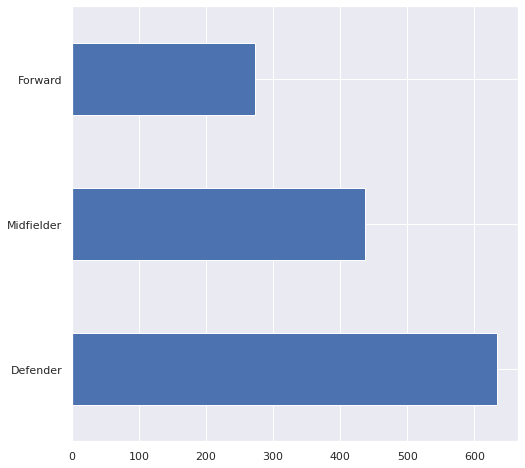

In [ ]:
pozycja=dataframe["position"].value_counts()
print(pozycja)
plt.figure()
pozycja.plot.barh(figsize = (8,8), facecolor = None)

Struktura danych:

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344 entries, 2530 to 2620
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nationality         1344 non-null   int64  
 1   age                 1344 non-null   int64  
 2   position            1344 non-null   object 
 3   value               1344 non-null   int64  
 4   goals_per90         1344 non-null   float64
 5   assists_per90       1344 non-null   float64
 6   fouls_per90         1344 non-null   float64
 7   cards_yellow_per90  1344 non-null   float64
 8   cards_red_per90     1344 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 105.0+ KB


In [ ]:
dataframe.describe()

,nationality,age,value,goals_per90,assists_per90,fouls_per90,cards_yellow_per90,cards_red_per90
count,1344.0000,1344.0000,1344.0000,1344.0000,1344.0000,1344.0000,1344.0000,1344.0000
mean,41.4516,25.6064,9731013.7649,0.1225,0.0626,3.9679,0.2573,0.0134
std,28.3010,4.3802,15876609.9664,0.6440,0.1351,38.7410,1.2731,0.0511
min,0.0000,15.0000,5000.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,19.0000,22.0000,1500000.0000,0.0000,0.0000,0.7729,0.0631,0.0000
50%,43.0000,26.0000,4000000.0000,0.0000,0.0000,1.1677,0.1716,0.0000
75%,73.0000,29.0000,10000000.0000,0.1200,0.0900,1.6750,0.2868,0.0000
max,97.0000,38.0000,150000000.0000,22.5000,2.9000,990.0000,45.0000,0.8571


In [ ]:
dataframe.head()

,nationality,age,position,value,goals_per90,assists_per90,fouls_per90,cards_yellow_per90,cards_red_per90
2530,43,24,Defender,70000000,0.0000,0.0400,0.6595,0.1164,0.0000
721,1,21,Defender,2000000,0.0000,0.0800,2.0206,0.3789,0.0842
2512,43,23,Defender,60000000,0.0400,0.0000,0.9456,0.2878,0.0000
882,1,31,Midfielder,1800000,0.1100,0.0000,2.4364,0.3322,0.0000
1002,94,25,Forward,5000000,0.2200,0.1500,0.1488,0.2231,0.0000


Powrót do numerycznego przedstawienia pozycji na boisku (obrońca -> 0, pomocnik -> 2, napastnik -> 4):

In [ ]:
for key, value in positions_dict_inverse.items():
  dataframe["position"] = dataframe["position"].replace(value, key)

In [ ]:
dataframe.groupby(['position'])['position'].count()

position
0    634
2    437
4    273
Name: position, dtype: int64

Filtracja danych. Odrzucenie odstających wartości, które zaburzają czytelność wykresów:

In [ ]:
dataframe = dataframe[dataframe["goals_per90"]<2]
dataframe = dataframe[dataframe["assists_per90"]<1.1]
dataframe = dataframe[dataframe["cards_yellow_per90"]<2]
dataframe = dataframe[dataframe["cards_red_per90"]<0.5]
dataframe = dataframe[dataframe["fouls_per90"]<5]

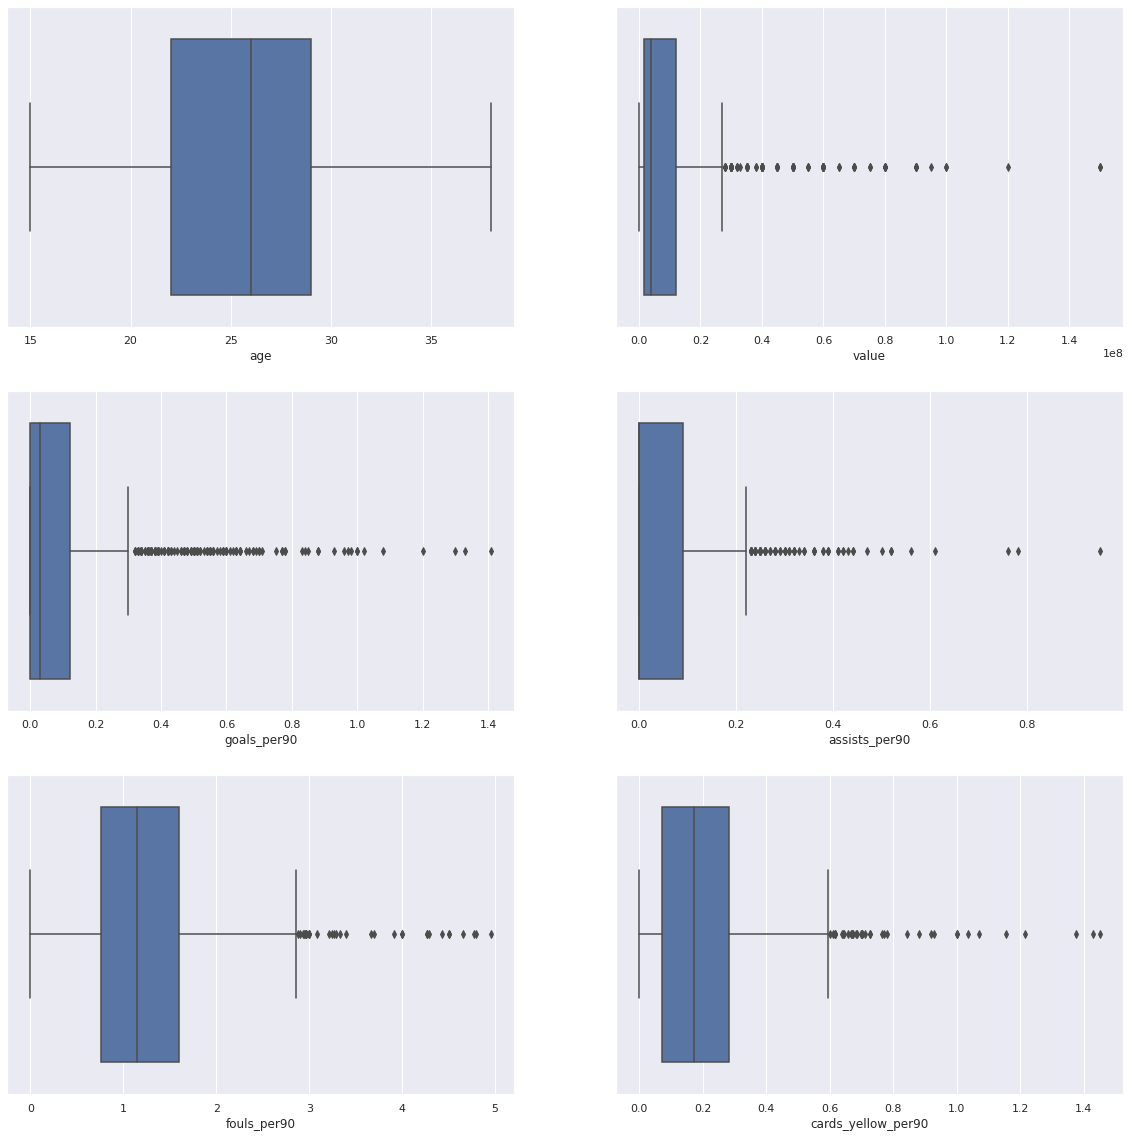

In [ ]:
plt.subplots(3,2,figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot(x=dataframe["age"])
plt.subplot(3,2,2)
sns.boxplot(x=dataframe["value"])
plt.subplot(3,2,3)
sns.boxplot(x=dataframe["goals_per90"])
plt.subplot(3,2,4)
sns.boxplot(x=dataframe["assists_per90"])
plt.subplot(3,2,5)
sns.boxplot(x=dataframe["fouls_per90"])
plt.subplot(3,2,6)
sns.boxplot(x=dataframe["cards_yellow_per90"])

Powyższe wykresy pudełkowe obrazują podstawowe parametry statystyczne każdej z kolumn. "Pudełko" (niebieski prostokąt) jest wyznaczony przez wartości pierwszego i trzeciego kwantyla. Linia pośrodku przedstawia wartośc mediany, natomiast "wąsy" sięgają wartości maksymalnej i minimalnej. Wartości odstające są oznaczone osobnymi punktami.

Histogramy:

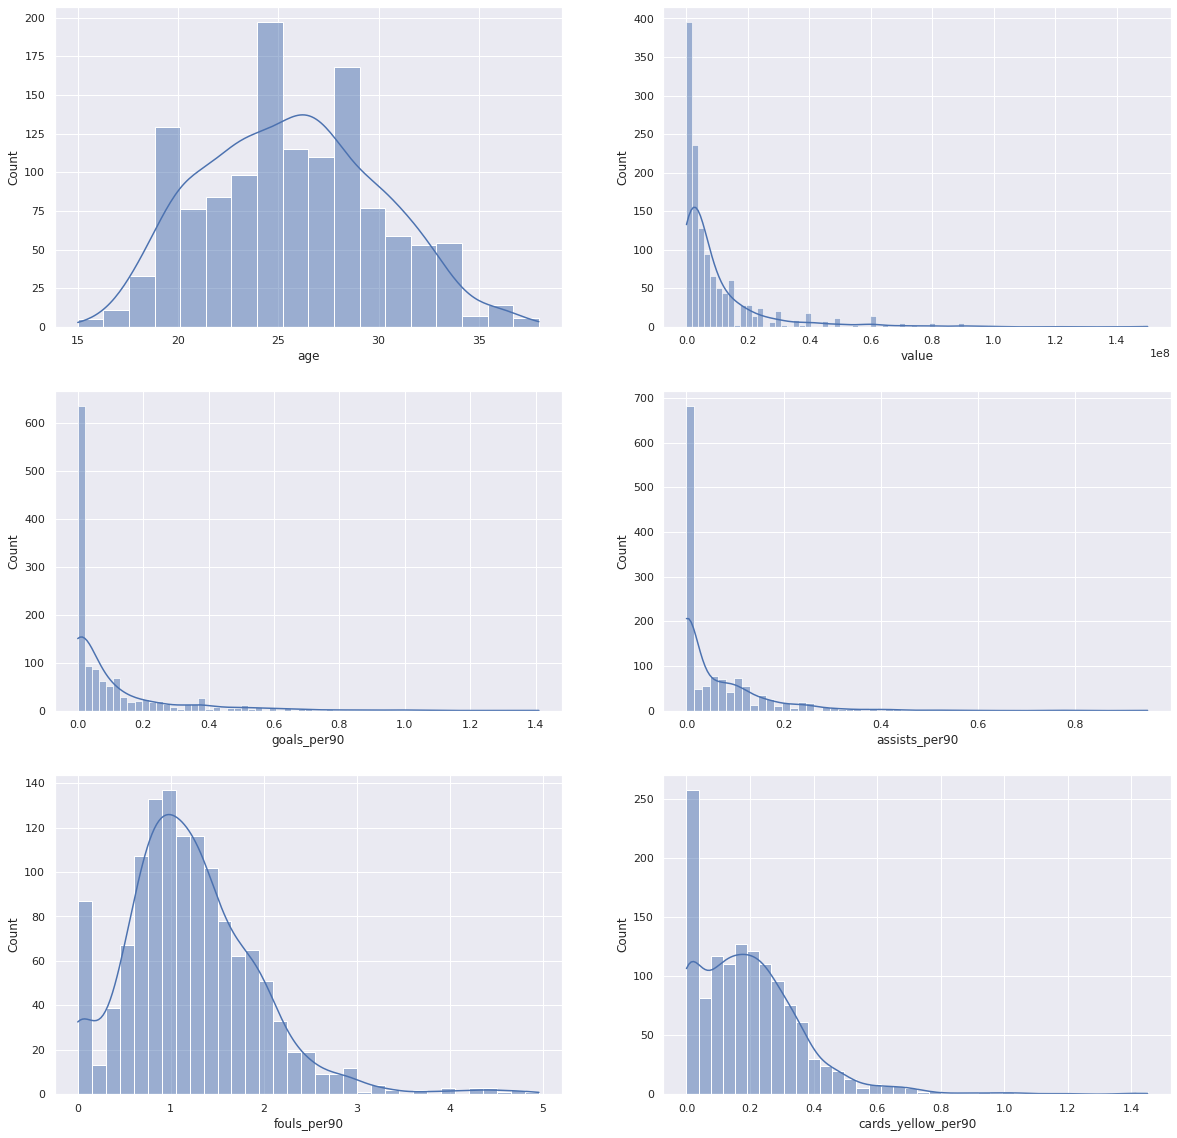

In [ ]:
plt.subplots(3,2,figsize=(20,20))
plt.subplot(3,2,1)
sns.histplot(x=dataframe["age"], kde=True)
plt.subplot(3,2,2)
sns.histplot(x=dataframe["value"], kde=True)
plt.subplot(3,2,3)
sns.histplot(x=dataframe["goals_per90"], kde=True)
plt.subplot(3,2,4)
sns.histplot(x=dataframe["assists_per90"], kde=True)
plt.subplot(3,2,5)
sns.histplot(x=dataframe["fouls_per90"], kde=True)
plt.subplot(3,2,6)
sns.histplot(x=dataframe["cards_yellow_per90"], kde=True)

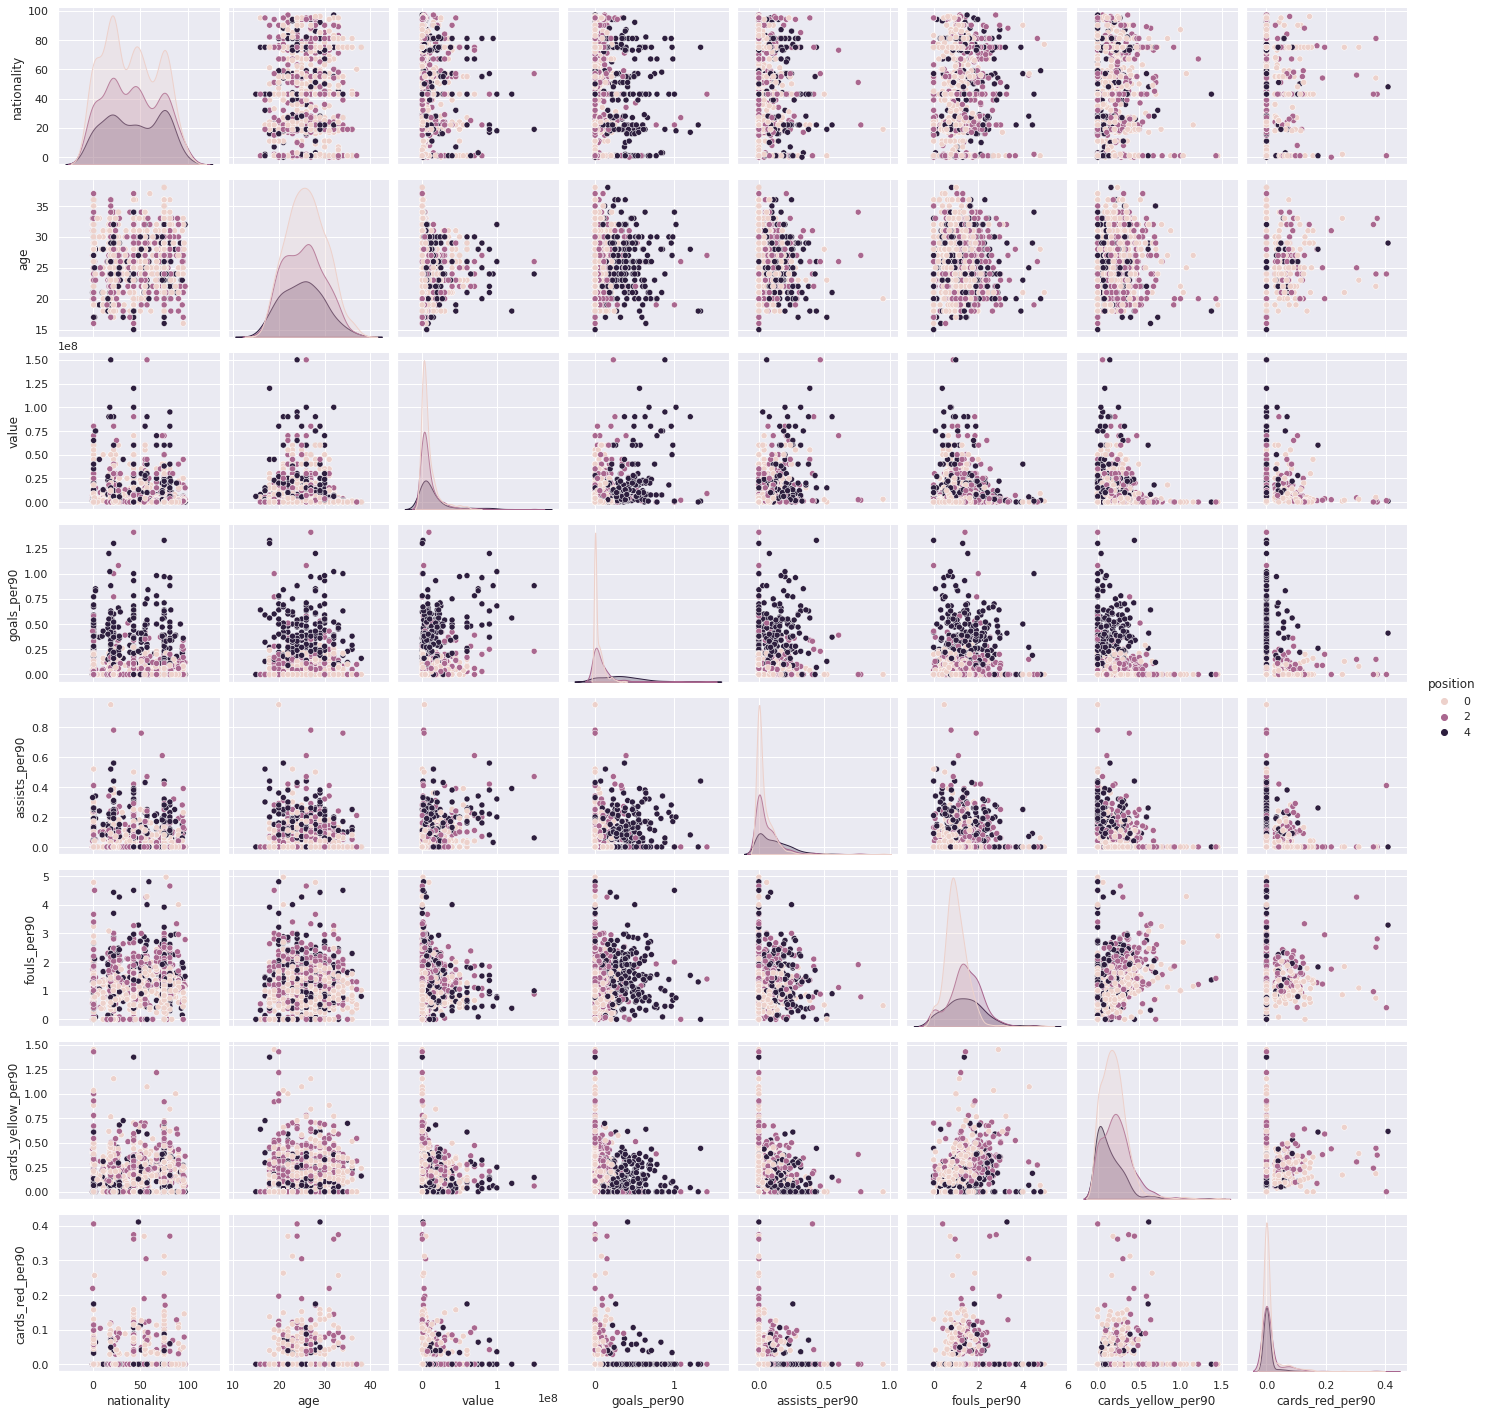

In [ ]:
sns.pairplot(dataframe, hue="position")

# **WYBÓR PARAMETRÓW DANYCH, CEL ANALIZY**

Ze względu na bardzo obszerną bazę danych została ona ręcznie ograniczona do mniejszej bazy.
Ograniczenie bazy jest równoznaczne z wybraniem parametrów danych do przeprowadzenia analiz.

# **ANALIZA NORMALNOŚCI ROZKŁADÓW**

Z uwagi na liczne grupy (>100), do sprawdzenia normalności wykorzystano test **scipy.stats.normaltest**.

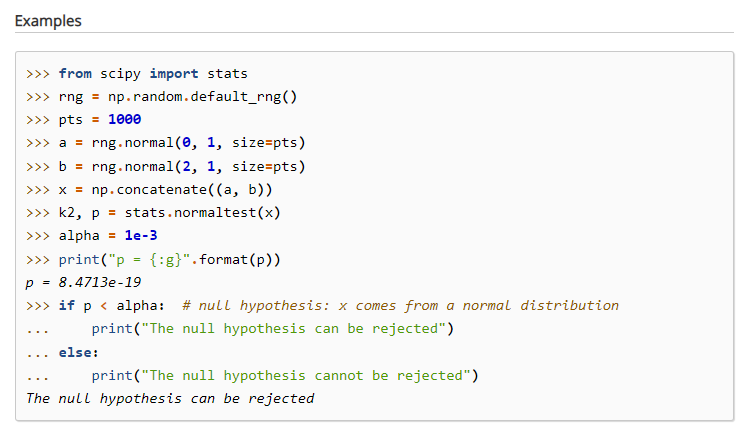

Testy normalności rozkładów:

In [ ]:
alpha = 0.001

for c in dataframe.columns:
  dataframe[c]
  print(c)
  print(normaltest(dataframe[c], axis=0, nan_policy='propagate'))

nationality
NormaltestResult(statistic=1096.1894431785165, pvalue=9.236062295426671e-239)
age
NormaltestResult(statistic=38.97093268581025, pvalue=3.44801772704054e-09)
position
NormaltestResult(statistic=690.2365425831368, pvalue=1.3093000187058201e-150)
value
NormaltestResult(statistic=1002.1989334648754, pvalue=2.372830485604581e-218)
goals_per90
NormaltestResult(statistic=796.6404473747116, pvalue=1.0273651322416174e-173)
assists_per90
NormaltestResult(statistic=851.3994377570305, pvalue=1.3211774220062382e-185)
fouls_per90
NormaltestResult(statistic=280.9293317010373, pvalue=9.930490922091742e-62)
cards_yellow_per90
NormaltestResult(statistic=566.8354569586721, pvalue=8.18925600555162e-124)
cards_red_per90
NormaltestResult(statistic=1380.4991871981063, pvalue=1.692038980705408e-300)


H0: Dane mają rozkład normalny.

H1: Dane nie mają rozkładu normalnego.

Jeżeli wartość pvalue jest **mniejsza** niż alpha to odrzucamy hipotezę zerową.

**pvalue < alpha**

Z racji tego, iż wszystkie zmienne nie mają rozkładu normalnego do przeprowadzenia analizy korelacji wykorzystany został test korelacji rang Spearmana.

Korelacje:

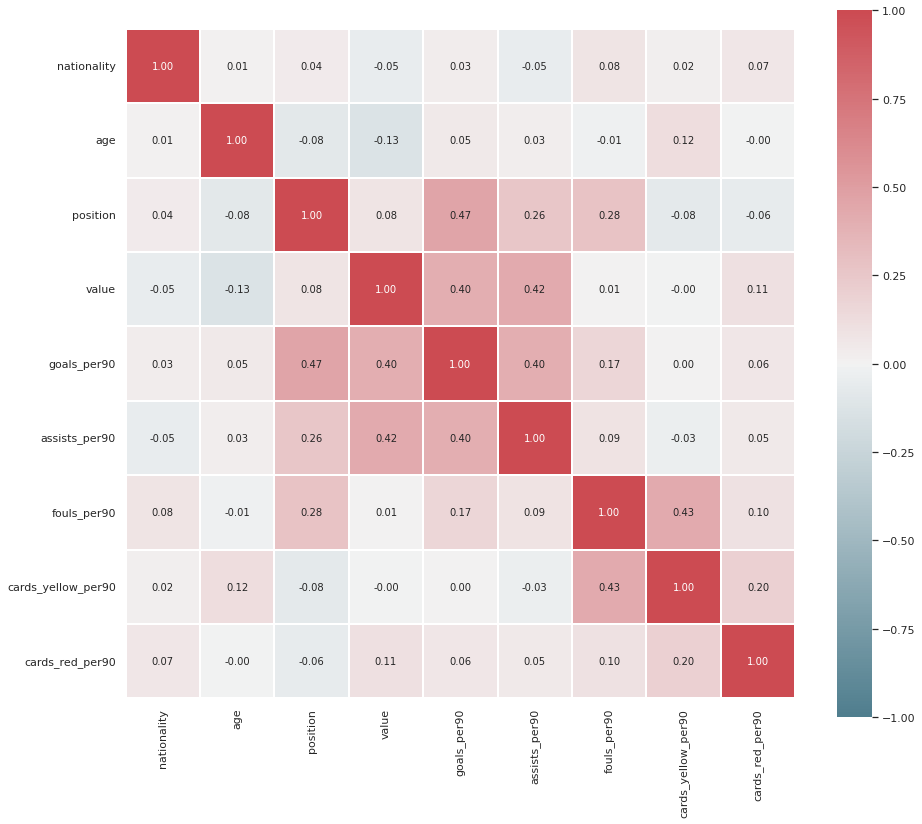

In [ ]:
corr = dataframe.corr('spearman')
f, ax = plt.subplots(figsize=(15,13))
sns.heatmap(corr, annot=corr, cmap=sns.diverging_palette(220,10,s=60,as_cmap = True), vmin=-1, vmax=1, center=0, fmt=".2f", square = True, linewidths=1)
plt.show()

Usunięcie kolumn, które są mocno skorelowane:

In [ ]:
dataframe.drop(columns = ['goals_per90', 'assists_per90', 'cards_yellow_per90'], inplace = True)

Ponowne sprawdzenie korelacji po usunięciu mocno skorelowanych kolumn:

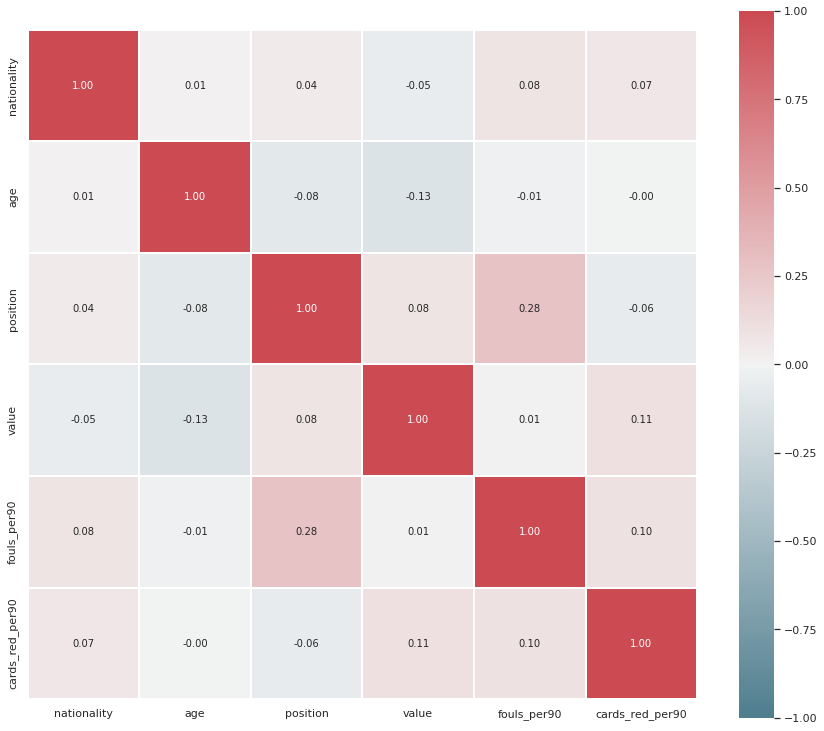

In [ ]:
corr = dataframe.corr('spearman')
f, ax = plt.subplots(figsize=(15,13))
sns.heatmap(corr, annot=corr, cmap=sns.diverging_palette(220,10,s=60,as_cmap = True), vmin=-1, vmax=1, center=0, fmt=".2f", square = True, linewidths=1)
plt.show()

# **TWORZENIE MODELU**

Podział na zbiór testowy i treningowy:

In [ ]:
train_XY, test_XY = train_test_split(
    dataframe, 
    test_size = 0.2,
    stratify=dataframe['position'],
)

In [ ]:
train_Y = train_XY["position"]
test_Y = test_XY["position"]

train_XY.drop(columns = "position")
test_XY.drop(columns = "position")

train_X = train_XY
test_X = test_XY

Standaryzacja i skalowanie:

In [ ]:
# standard_scaler = StandardScaler().fit(train_X)

# # Standaryzacja
# X_train_ST = standard_scaler.transform(train_X)
# X_test_ST = standard_scaler.transform(test_X)

# # Skalowanie
# scaler = MinMaxScaler(feature_range=[0,1])
# X_train_SK = scaler.fit_transform(train_X) 
# X_test_SK = scaler.fit_transform(test_X) 

**METODY NADZOROWANE**

Klasyfikator - K najbliższych sąsiadów

In [ ]:
# Tworzenie klasyfikatora
model = KNeighborsClassifier(n_neighbors=3)

# Trenowanie klasyfikatora
model.fit(train_X, train_Y)

# Predykcja
predictions = model.predict(test_X)

# Skuteczność klasyfikatora na zbiorze testowym
result = accuracy_score(test_Y, predictions)
print(result) 

0.46153846153846156


Podejmowane były próby uzyskania jak najlepszej dokładności modelu poprzez testowanie różnych wartości parametru **n_neighbors**, jak i podawanie zmiennych standaryzowanych i skalowanych.



**Najlepszą dokładność na poziomie osiągnięto dla: ilość sąsiadów = 3, dane nieskalowane i niestandaryzowane.**

Poniżej zaprezentowane są dokładności dla innych wartości parametrów.


Dane niestandaryzowane i nieskalowane:

*   ilość sąsiadów = 3: dokładność 46%
*   ilość sąsiadów = 5: dokładność 46%
*   ilość sąsiadów = 7: dokładność 39%
*   ilość sąsiadów = 10: dokładność 41%

Dane standaryzowane i skalowane:

*   ilość sąsiadów = 3: dokładność 43%
*   ilość sąsiadów = 5: dokładność 45%
*   ilość sąsiadów = 7: dokładność 44%
*   ilość sąsiadów = 10: dokładność 42%

Poniżej zaprezentowano ewaluację modelu w postaci **macierzy pomyłek**:

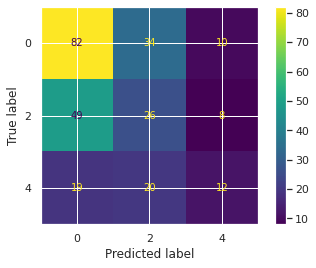

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_Y, predictions)

macierz = plot_confusion_matrix(model, test_X, test_Y)

Jak można zaobserwować na powyższej macierzy pomyłek, model nie potrafił wytrenować zależności pomiędzy pozycjami na boisku. Najmniejszy problem miał z prawidłowym sklasyfikowaniem obrońców. Mogło być to spowodowane faktem, że grupa obrońców była najliczniejsza. Dodatkowo spora część pomocników została sklasyfkowana jako obrońcy.

Walidacja k-krotna (K-Fold):

In [ ]:
logreg = LogisticRegression(max_iter=10000)

logreg.fit(train_X, train_Y)
# Skuteczność klasyfikatora na zbiorze testowym
result = accuracy_score(test_Y, logreg.predict(test_X))
print(result) 

scores = cross_val_score(logreg, train_X, train_Y, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print(scores.min(), scores.mean(), scores.max())

0.4846153846153846
Cross-Validation Accuracy Scores [0.49038462 0.48076923 0.48076923 0.48076923 0.48076923 0.48076923
 0.48543689 0.48543689 0.48543689 0.48543689]
0.4807692307692308 0.4835978342046302 0.49038461538461536


Obserwując powyższe wyniki można zauważyć, iż walidacja k-krotna (K-Fold) delikatnie poprawiła dokładność stworzonego modelu - średnia dokładność po walidacji wynosi **0,4799**, co jest ciekawym zjawiskiem, ponieważ ilość danych do treningu była mniejsza.

**METODY NIENADZOROWANE**

Klasteryzacja:

In [ ]:
dataframe_klasteryzacja = dataframe
dataframe_klasteryzacja.drop(columns = "position")

,nationality,age,value,fouls_per90,cards_red_per90
2530,43,24,70000000,0.6595,0.0000
721,1,21,2000000,2.0206,0.0842
2512,43,23,60000000,0.9456,0.0000
882,1,31,1800000,2.4364,0.0000
1002,94,25,5000000,0.1488,0.0000
...,...,...,...,...,...
1226,22,27,50000,1.1538,0.0000
1859,57,22,10000000,0.0000,0.0000
1168,22,19,5000,1.0000,0.0000
2546,24,33,1000000,0.6886,0.0000


In [ ]:
clusterer = KMeans(n_clusters=3, random_state=0)

cluster_data = dataframe_klasteryzacja
cluster_labels = clusterer.fit_predict(cluster_data)
print('Wyniki klasteryzacji: ',cluster_labels)

Wyniki klasteryzacji:  [1 0 1 ... 0 0 0]


**Osuwisko**

Wybór liczby klas:

In [ ]:
resultat_osuwisko = []
# 3 grupy są poprawne
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(cluster_data)
    resultat_osuwisko.append([n, kmeans.inertia_])
resultat_osuwisko= pd.DataFrame(resultat_osuwisko, columns = ['liczba_grup', 'inercja'])
resultat_osuwisko.head(5)

,liczba_grup,inercja
0,2,110079860073750912.0000
1,3,56625653594084832.0000
2,4,33077531905845992.0000
3,5,23536711801973928.0000
4,6,15532804082250030.0000


Do osuwiska potrzebny jest spadek procentowy, a nie wartości inercji:

In [ ]:
diff = [0]
for n in range(0, 7):
    diff.append(((resultat_osuwisko.iloc[n,1] - resultat_osuwisko.iloc[n+1, 1])/resultat_osuwisko.iloc[n, 1]*100))
resultat_osuwisko = resultat_osuwisko.assign(zysk_proc = diff)
resultat_osuwisko.set_index('liczba_grup', inplace = True)
resultat_osuwisko.head(15)

,inercja,zysk_proc
liczba_grup,,
2,110079860073750912.0000,0.0000
3,56625653594084832.0000,48.5595
4,33077531905845992.0000,41.5856
5,23536711801973928.0000,28.8438
6,15532804082250030.0000,34.0061
7,10733158832282808.0000,30.9001
8,7647040682992228.0000,28.7531
9,6108713191652150.0000,20.1166


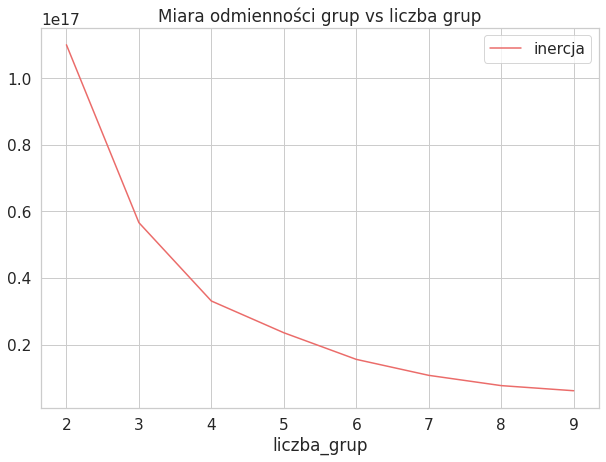

In [ ]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = resultat_osuwisko.drop('zysk_proc', axis = 1), palette = ['#eb6c6a']).set(title = "Miara odmienności grup vs liczba grup")
plt.show()

Klasteryzacja według osuwiska jest właściwa dla 5 grup wzwyż.

In [ ]:
clusterer = KMeans(n_clusters=5, random_state=0)
cluster_data = dataframe_klasteryzacja
cluster_labels = clusterer.fit_predict(cluster_data)

dataframe_klasteryzacja['klasteryzacja'] = cluster_labels

In [ ]:
wyniki = []
oczekiwany_klaster = 0
print('Wyniki klasteryzacji:\n')

for a in range(0, 5):
  print(f"\nKlaster {str(oczekiwany_klaster)}")
  pos = list()
  for c in dataframe_klasteryzacja.index[:]:
    if (dataframe_klasteryzacja['klasteryzacja'][c] == oczekiwany_klaster):
      pos.append(dataframe_klasteryzacja['position'].loc[c])
  for i in [0,2,4]:
    print(f"{i}: {pos.count(i)}")
  oczekiwany_klaster = oczekiwany_klaster + 1

Wyniki klasteryzacji:


Klaster 0
0: 464
2: 298
4: 157

Klaster 1
0: 10
2: 9
4: 20

Klaster 2
0: 118
2: 77
4: 62

Klaster 3
0: 0
2: 1
4: 2

Klaster 4
0: 35
2: 28
4: 15


Klasteryzacja wydaje się być problematyczna.

**Analiza hierarchiczna**

Normalizacja danych

In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

dataframe_klasteryzacja = dataframe
dataframe_klasteryzacja.drop(columns = "position")

scaler = MinMaxScaler()
dane_przeskalowane = pd.DataFrame(scaler.fit_transform(dataframe_klasteryzacja))

Statystyka Hopkinsa

In [ ]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
print('Statystyka Hopkinsa wynosi: ', round(hopkins(dane_przeskalowane),2))

Statystyka Hopkinsa wynosi:  0.88


Statystyka Hopkinsa wynosi 0.88. 0.88 > 0.7, a więc dane mają tendencję do grupowania.

In [ ]:
dane_przeskalowane

,0,1,2,3,4,5,6
0,0.4433,0.3913,0.0000,0.4666,0.1329,0.0000,0.2500
1,0.0103,0.2609,0.0000,0.0133,0.4073,0.2049,0.0000
2,0.4433,0.3478,0.0000,0.4000,0.1906,0.0000,0.2500
3,0.0103,0.6957,0.5000,0.0120,0.4912,0.0000,0.0000
4,0.9691,0.4348,1.0000,0.0333,0.0300,0.0000,0.0000
...,...,...,...,...,...,...,...
1291,0.2268,0.5217,0.0000,0.0003,0.2326,0.0000,0.0000
1292,0.5876,0.3043,1.0000,0.0666,0.0000,0.0000,0.5000
1293,0.2268,0.1739,0.0000,0.0000,0.2016,0.0000,0.0000
1294,0.2474,0.7826,0.0000,0.0066,0.1388,0.0000,0.0000


Metoda pojedynczego wiązania

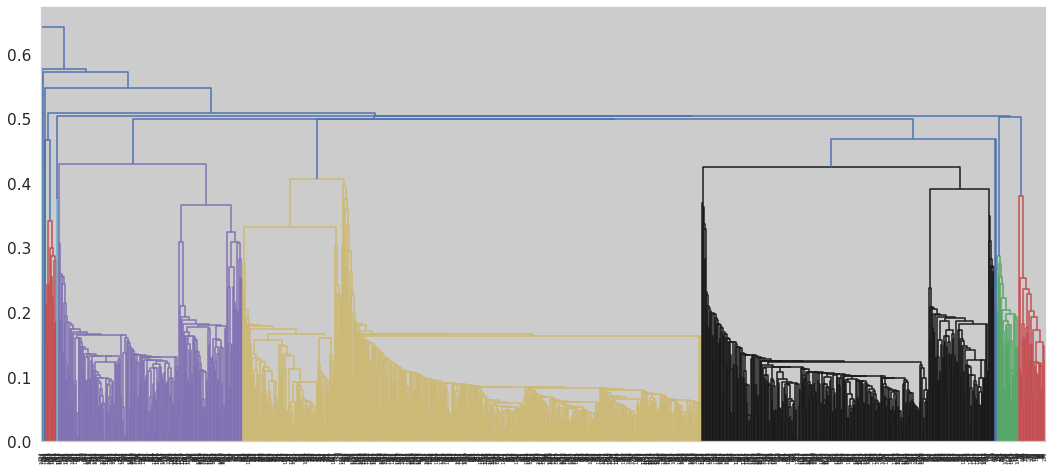

In [ ]:
plt.figure(figsize = (18,8))
mergings = linkage(dane_przeskalowane, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

Metoda pełnego wiązania

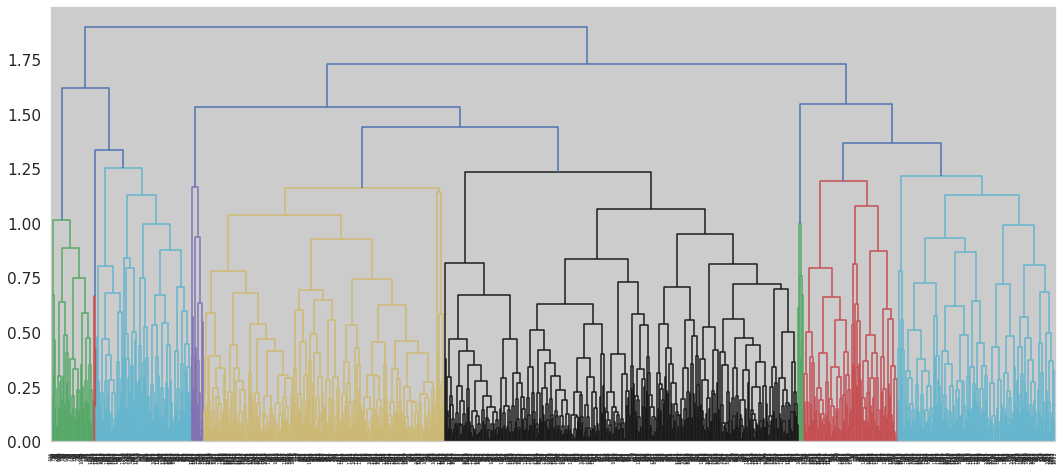

In [ ]:
plt.figure(figsize = (18,8))
mergings = linkage(dane_przeskalowane, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

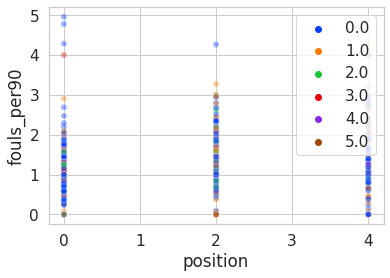

In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=6).reshape(-1,)
cluster_labels
unique, counts = np.unique(cluster_labels, return_counts=True)
dict(zip(unique, counts))

dataframe_klasteryzacja['H_ClusterID'] = pd.Series(cluster_labels)
sns.scatterplot(x='position', y='fouls_per90', hue='H_ClusterID', data=dataframe_klasteryzacja, palette="bright", alpha=.4)
plt.legend(loc='upper right')

Jak widać model miał problem z pogrupowaniem zawodników przez klastry.

# **WNIOSKI**

Na potrzeby projektu przeanalizowane zostały dane dotyczące statystyk piłkarzy w sezonie 2017/18 zebrane z platformy Kaggle. Przeprowadzono analizę zmodyfikowanej bazy, a następnie wybrano kilka parametrów analizowanych zawodników. Przeprowadzono analizę, zbadano normalność rozkładów parametów oraz korelację między nimi. Następnie został stworzony model, który wytrenowano na wspomnianej bazie. 

Otrzymano model, który z dokładnością na poziomie 46% był w stanie rozróżnić i odpowiednio zaklasyfikować jedną z trzech podstawowych pozycji na boisku (obrońca, pomocnik, napastnik). Testowane były różne kombinacje parametrów modelu, tak aby uzyskać jak najwyższą dokładność. Wykonano macierz pomyłek, z której wynika iż model najlepiej poradził sobie z odpowiednią klasyfikacją obrońców.

Okazuje się, że klasyfikator miał problem z podziałem danych według określonych zasad. Najbardziej zbliżone siebie klasy to "pomocnik" i "napastnik", z którymi to klasyfikator miał największy problem. Dodatkowo spora część pomocników została sklasyfkowana jako obrońcy.

Badana przykładowa zależność pozycji na boisku od ilości fauli nie wykazała jednoznacznych analogii i zależności.